In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

In [66]:
file_path = r"C:\Users\jeevesh\Downloads\disney_plus_titles.csv"
data = pd.read_csv(file_path)

In [67]:
data['date_added'] = pd.to_datetime(data['date_added'])

In [68]:
# 1. Time Series Analysis for Forecasting Trends and Seasonality

# Prepare the data for time series analysis
monthly_data = data['date_added'].dt.to_period('M').value_counts().sort_index()

In [69]:
# Fit the ARIMA model
model = ARIMA(monthly_data, order=(5, 1, 0))
model_fit = model.fit()

c:\Users\Maulik\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [70]:
# Forecast the next 12 months
forecast = model_fit.forecast(steps=12)


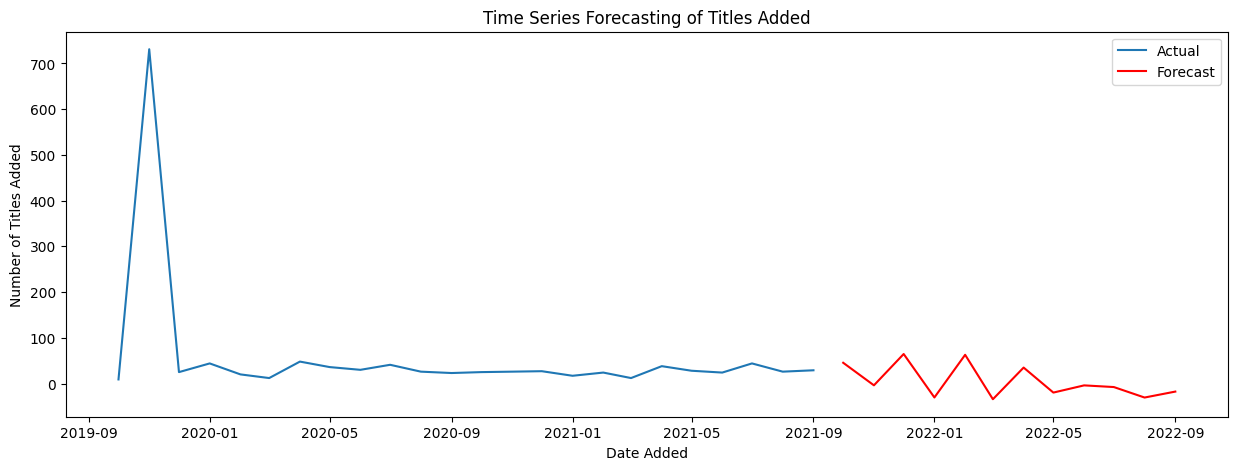

In [71]:
# Plot the original data and the forecast
plt.figure(figsize=(15, 5))
plt.plot(monthly_data.index.to_timestamp(), monthly_data, label='Actual')
plt.plot(forecast.index.to_timestamp(), forecast, label='Forecast', color='red')
plt.xlabel('Date Added')
plt.ylabel('Number of Titles Added')
plt.title('Time Series Forecasting of Titles Added')
plt.legend()
plt.show()

In [3]:
from nltk import download  # type: ignore
download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Maulik\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [73]:
# 2. Sentiment Analysis on Unstructured Data
def sentiment_analysis(text_data):
    sid = SentimentIntensityAnalyzer()
    sentiments = [sid.polarity_scores(text) for text in text_data]
    return sentiments

In [75]:
# Perform sentiment analysis on the description column
data['description'] = data['description'].fillna('')
sentiments = sentiment_analysis(data['description'])
sentiment_df = pd.DataFrame(sentiments)
data = pd.concat([data, sentiment_df], axis=1)
print("Sentiment Analysis Results:\n", data[['title', 'compound']])

Sentiment Analysis Results:
                                title  compound
0                      A Spark Story    0.2263
1                     Spooky Buddies   -0.2023
2             The Fault in Our Stars    0.7506
3                    Dog: Impossible    0.0000
4     Spidey And His Amazing Friends    0.0000
...                              ...       ...
1363          The Sword in the Stone    0.0000
1364                 Those Calloways   -0.3612
1365            Disney Kirby Buckets    0.0000
1366                  Disney Mech-X4    0.3182
1367              Imagination Movers    0.5093

[1368 rows x 2 columns]


In [76]:
# 3. Clustering Techniques for Segmentation and Pattern Recognition
def kmeans_clustering(text_data, num_clusters=3):
    vectorizer = TfidfVectorizer(stop_words='english')
    X = vectorizer.fit_transform(text_data)
    kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(X)
    return kmeans.labels_

# Perform clustering on the description column
data['description'] = data['description'].fillna('')
clusters = kmeans_clustering(data['description'])
data['cluster'] = clusters
print("Clustering Results:\n", data[['title', 'cluster']])

Clustering Results:
                                title  cluster
0                      A Spark Story        0
1                     Spooky Buddies        0
2             The Fault in Our Stars        1
3                    Dog: Impossible        0
4     Spidey And His Amazing Friends        0
...                              ...      ...
1363          The Sword in the Stone        0
1364                 Those Calloways        0
1365            Disney Kirby Buckets        0
1366                  Disney Mech-X4        0
1367              Imagination Movers        0

[1368 rows x 2 columns]
